In [123]:
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.image as image
from matplotlib import artist
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Franklin Gothic Medium', 'Franklin Gothic Book']

In [116]:
# Importing necessary data tables as Pandas DataFrames

passing_rough = pd.read_excel(r'C:\Users\aaron\Documents\ET5L end of Season\Passing Stats.xlsx')
possession_rough = pd.read_excel(r'C:\Users\aaron\Documents\ET5L end of Season\Possession Stats.xlsx')
sca_rough = pd.read_excel(r'C:\Users\aaron\Documents\ET5L end of Season\GCASCA Stats.xlsx')

In [189]:
# Removing all players with less than 900 minutes

nineties_passing = passing_rough['90s'] >= 10
passing_filtered = passing_rough[nineties_passing].set_index('Player')

nineties_possession = possession_rough['90s'] >= 10
possession_filtered = possession_rough[nineties_possession].set_index('Player')

In [118]:
# Removing all non-midfielders

passing_position = passing_filtered['Pos'].str.startswith('MF')
passing_fullfilter = passing_filtered[passing_position]

possession_position = possession_filtered['Pos'].str.startswith('MF')
possession_fullfilter = possession_filtered[possession_position]

In [191]:
# Features needed for percentile chart

passing_features = ['Squad', '90s', 'Cmp%', 'PrgDist', '1/3', 'Prog']
possession_features = ['Squad', '90s', 'SuccDrb', 'Succ%Drb', 'PrgDistCarry', 'Miscon', 'Dispos']

passing_absolute = passing_fullfilter[passing_features]
possession_absolute = possession_fullfilter[possession_features]

In [783]:
# Generate Percentiles DataFrame

passing_percentiles= pd.DataFrame()
passing_percentiles['Squad'] = passing_absolute['Squad']
passing_percentiles['Pass\nComp %'] = passing_absolute['Cmp%'].rank(pct=True)*100
passing_percentiles['Progressive Pass/Carry\nYards p90'] = ((passing_absolute['PrgDist']+possession_absolute['PrgDistCarry'])/ \
                                      passing_absolute['90s']).rank(pct=True)*100
passing_percentiles['Passes into\nFinal Third\np90'] = (passing_absolute['1/3']/passing_absolute['90s']).rank(pct=True)*100
passing_percentiles['Progressive\nPasses p90'] = (passing_absolute['Prog']/passing_absolute['90s']).rank(pct=True)*100
passing_percentiles['Rate Adj Successful\nDribbles p90'] = (possession_absolute['SuccDrb']*possession_absolute['Succ%Drb']/ \
                                           possession_absolute['90s']).rank(pct=True)*100
passing_percentiles['Miscontrols+\nDispossessions\np90'] = ((possession_absolute['Miscon']+possession_absolute['Dispos'])/ \
                                        possession_absolute['90s']).rank(pct=True, ascending=False)*100

passing_percentiles

,Squad,Pass\nComp %,Progressive Pass/Carry\nYards p90,Passes into\nFinal Third\np90,Progressive\nPasses p90,Rate Adj Successful\nDribbles p90,Miscontrols+\nDispossessions\np90
Player,,,,,,,
Mehdi Abeid,Nantes,67.361111,47.619048,69.047619,42.460317,13.095238,62.003968
Yacine Adli,Bordeaux,44.940476,69.444444,74.007937,78.571429,78.571429,3.174603
Luis Alberto,Lazio,43.551587,99.404762,95.833333,99.206349,86.507937,30.357143
Thiago Alcántara,Bayern Munich,94.841270,99.007937,99.603175,98.611111,98.412698,73.214286
Rubén Alcaraz,Valladolid,40.079365,68.650794,74.404762,60.515873,48.412698,83.928571
...,...,...,...,...,...,...,...
Jaromír Zmrhal,Brescia,10.218254,7.142857,13.392857,33.630952,24.603175,69.841270
Igor Zubeldia,Real Sociedad,88.392857,84.722222,33.333333,32.341270,41.071429,94.642857
Bongani Zungu,Amiens,54.464286,43.650794,53.174603,59.523810,5.753968,64.682540


In [780]:
players = passing_percentiles['Squad'] == "Southampton"
passing_percentiles[players]

,Squad,Pass\nComp %,Progressive Pass/Carry\nYards p90,Passes into\nFinal Third\np90,Progressive\nPasses p90,Rate Adj Successful\nDribbles p90,Miscontrols+\nDispossessions
Player,,,,,,,
Stuart Armstrong,Southampton,27.281746,25.595238,10.416667,29.464286,66.269841,24.404762
Moussa Djenepo,Southampton,13.194444,41.865079,2.380952,22.023810,99.603175,2.380952
Pierre Højbjerg,Southampton,37.301587,63.690476,77.976190,57.738095,68.849206,44.444444
Nathan Redmond,Southampton,17.757937,44.444444,7.341270,25.000000,94.246032,20.634921
Oriol Romeu,Southampton,65.376984,36.111111,66.666667,48.214286,30.158730,97.023810
James Ward-Prowse,Southampton,18.650794,33.928571,52.182540,77.380952,10.317460,91.071429


C:\Users\aaron\anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


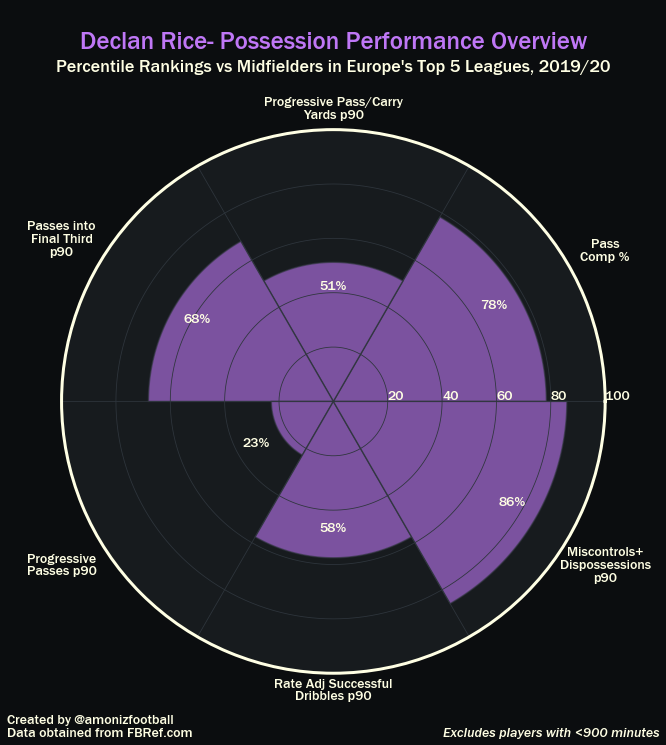

In [834]:
## Setting bar values

player_name = "Declan Rice"

theta = list(map((lambda x: x*math.pi/6), list(range(1,13,2))))
radii = list(passing_percentiles.loc[player_name][1:])
width = [math.pi/3]*len(radii)

def label_adjuster(i):
    if i <= 50:
        return 10
    else:
        return -10
    
# Creating figure

plt.figure(figsize=(10,10), facecolor = '#0b0d0f')
ax = plt.subplot(111, projection='polar')
ax.set_facecolor('#171b1e')
ax = plt.subplot(111, projection='polar')
ax.grid(True, color='#2e353c')
ax.tick_params(axis='x', colors='xkcd:off white')
ax.tick_params(axis='y', colors='xkcd:off white')
ax.set_rlim(0,100)
ax.spines['polar'].set_color('xkcd:off white')
ax.spines['polar'].set_linewidth(3)
ax.set_rlabel_position(0)
ax.set_rticks([20,40,60,80,100])
ax.bar(theta, radii, width, color=color_setter(player_name), alpha=0.6, edgecolor='#2e353c', linewidth=1.5)
ax.set_title('\n'+player_name+'- Possession Performance Overview\n\n', color=color_setter(player_name), fontsize=25)
ax.tick_params(labelsize=14)

l = list(passing_percentiles)
labels = plt.thetagrids(range(0,360,60), ('','','','','',''))

ax.spines['polar'].set_color('xkcd:off white')
ax.spines['polar'].set_linewidth(3)

# Text
plt.text(-0.1, -0.075, 'Created by @amonizfootball\nData obtained from FBRef.com', \
         horizontalalignment='left', verticalalignment='top', color='xkcd:off white', transform=ax.transAxes, size='14')
plt.text(0.5, 1.13, "Percentile Rankings vs Midfielders in Europe's Top 5 Leagues, 2019/20", \
         horizontalalignment='center', verticalalignment='top', color='xkcd:off white', size='18', transform=ax.transAxes)
plt.text(1.1, -0.075, '\nExcludes players with <900 minutes', \
         horizontalalignment='right', verticalalignment='top', color='xkcd:off white', style='italic', \
         transform=ax.transAxes, size='14')
plt.text(1, 0.8, l[1], \
         horizontalalignment='center', verticalalignment='top', color='xkcd:off white', transform=ax.transAxes, size='14',\
        )
plt.text(0.5, 1.04, l[2], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:off white', transform=ax.transAxes, size='14',)
plt.text(0, 0.8, l[3], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:off white', transform=ax.transAxes, size='14',\
        )
plt.text(0, 0.2, l[4], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:off white', transform=ax.transAxes, size='14',\
        )
plt.text(0.5, -0.03, l[5], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:off white', transform=ax.transAxes, size='14',)
plt.text(1, 0.2, l[6], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:off white', transform=ax.transAxes, size='14',\
        )

def color_setter(name):
    if passing_percentiles.at[name, 'Squad'] in ['Liverpool', 'Manchester Utd', 'Arsenal', 'Sheffield Utd', \
                                                 'Southampton', 'Bournemouth', 'Atlético Madrid', \
                                                'Sevilla', 'Granada', 'Osasuna', 'Athletic Club', 'Celta Vigo', \
                                                'Mallorca', 'Espanyol', 'Bayern Munich', 'Roma', 'Milan', \
                                                'Bologna', 'Cagliari', 'Torino', 'Genoa', 'RB Leipzig', \
                                                'Leverkusen', 'Frankfurt', 'Mainz', 'Cologne', 'Augsburg', \
                                                 'Düsseldorf', 'Union Berlin', 'Rennes', 'Lille', 'Nice', 'Reims', \
                                                'Monaco', 'Brest', 'Dijon', 'Nîmes', 'Metz']:
        return 'xkcd:lightish red'
    elif passing_percentiles.at[name, 'Squad'] in ['Manchester City', 'Chelsea', 'Leicester City', 'Tottenham', \
                                                    'Everton', 'Paris S-G', 'Brighton', 'Real Madrid', \
                                                  'Real Sociedad', 'Getafe', 'Eibar', 'Alavés', 'Leganes', \
                                                  'Juventus', 'Inter', 'Atalanta', 'Lazio', 'Napoli', \
                                                  'Sampdoria', 'Brescia', 'SPAL', 'Udinese', 'Hoffenheim', \
                                                  'Hertha', 'Schalke', 'Paderborn', "M'gladbach", 'Freiburg', \
                                                  'Marseille', 'Lyon', 'Strasbourg', 'Bordeaux', 'Montpellier', \
                                                  'Angers', 'Amiens', 'Newcastle Utd']:
        return 'xkcd:water blue'
    elif passing_percentiles.at[name, 'Squad'] in ['Burnley', 'Crystal Palace', 'West Ham', 'Aston Villa', \
                                                  'Barcelona', 'Real Valladolid', 'Levante', 'Toulouse']:
        return 'xkcd:light purple'
    elif passing_percentiles.at[name, 'Squad'] in ['Watford', 'Norwich City', 'Villarreal', 'Verona', 'Parma', \
                                                  'Dortmund', 'Nantes']:
        return 'xkcd:golden yellow'
    elif passing_percentiles.at[name, 'Squad'] in ['Wolves', 'Valencia']:
        return 'xkcd:orange'
    elif passing_percentiles.at[name, 'Squad'] in ['Betis', 'Sassuolo', 'Wolfsburg', 'Werder Bremen', 'Saint-Étienne']:
        return 'xkcd:light green'
    
for i in [0,1,2,3,4,5]:
    plt.annotate(str(int(round(radii[i])))+"%", (theta[i], radii[i]+label_adjuster(radii[i])), color='xkcd:off white', \
                horizontalalignment='center', fontsize=14)

plt.show()